In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv',delimiter = ';')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
df['alcohol'].mean()

10.422983114446502

In [15]:
df['alcohol'].median()

10.2

In [19]:
np.percentile(df['alcohol'],[25,50,75])

array([ 9.5, 10.2, 11.1])

In [20]:
from scipy import stats

In [22]:
mode =stats.mode(df['pH'])

In [23]:
mode[0]

array([3.3])

In [24]:
mode[1]

array([57])

In [26]:
high = (df['quality']).max()

In [29]:
low = (df['quality'].min())

In [30]:
high

8

In [31]:
low

3

In [32]:
range = high - low

In [33]:
range

5

In [34]:
df['fixed acidity'].std()

1.7410963181277006

In [36]:
np.quantile(df['chlorides'],q= 0.25)

0.07

In [37]:
q1,q2,q3 = np.percentile(df['residual sugar'],[25,50,75])

In [38]:
q1,q2,q3

(1.9, 2.2, 2.6)

In [39]:
iqr = q3-q1

In [40]:
min_outliar = q1-1.5*iqr

In [41]:
min_outliar

0.8499999999999996

In [46]:
df['residual sugar'][df['residual sugar'] < min_outliar]

Series([], Name: residual sugar, dtype: float64)

In [47]:
df['residual sugar'].min()

0.9

In [48]:
max_outliar = q3 + 1.5*iqr

In [49]:
max_outliar

3.6500000000000004

In [50]:
df['residual sugar'][df['residual sugar']> max_outliar]

9        6.1
11       6.1
14       3.8
15       3.9
18       4.4
        ... 
1552     3.7
1558     6.7
1574    13.9
1577     5.1
1589     7.8
Name: residual sugar, Length: 155, dtype: float64

In [51]:
df['residual sugar'][df['residual sugar']> max_outliar].count()

155

Data Visualization

In [52]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


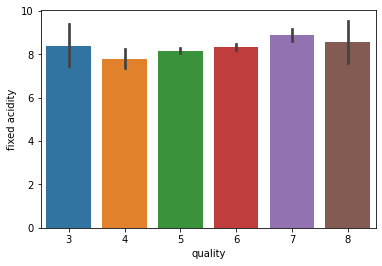

In [54]:
sns.barplot(x='quality',y = 'fixed acidity',data=df)

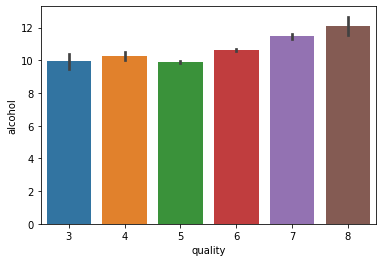

In [55]:
sns.barplot(x = 'quality',y = 'alcohol',data = df)

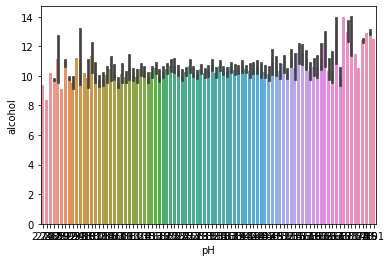

In [56]:
sns.barplot(x = 'pH',y='alcohol',data=df)   # not suitable for numerical data

In [57]:
bins = np.ceil(np.log(len(df['pH']))/np.log(2))

In [58]:
bins

11.0

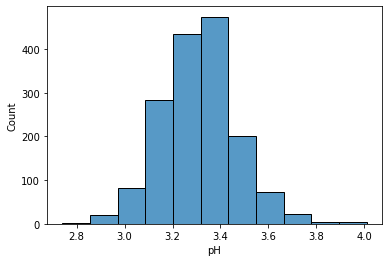

In [61]:
sns.histplot(x = 'pH',bins = int(bins) , data = df)

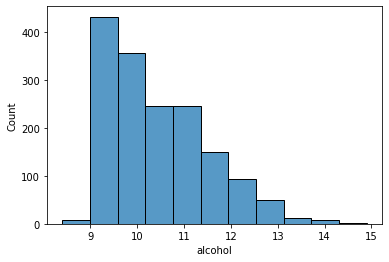

In [62]:
sns.histplot(x = 'alcohol',bins = int(bins),data = df)

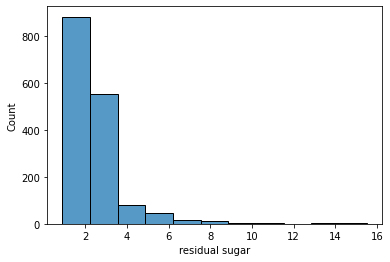

In [63]:
sns.histplot(x = df['residual sugar'],bins = int(bins))

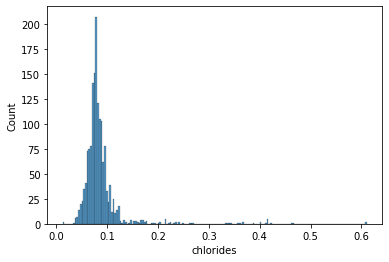

In [64]:
sns.histplot(df['chlorides'])

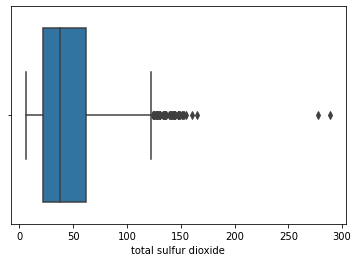

In [69]:
sns.boxplot(x = df['total sulfur dioxide'])

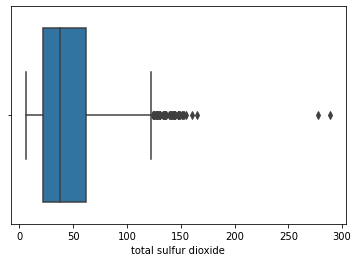

In [68]:
sns.boxplot(x =df['total sulfur dioxide'])

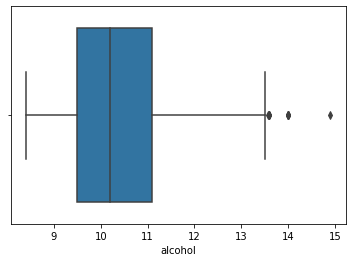

In [71]:
sns.boxplot(x = df['alcohol'])

In [72]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [74]:
np.corrcoef(df['fixed acidity'],df['volatile acidity'])

array([[ 1.        , -0.25613089],
       [-0.25613089,  1.        ]])

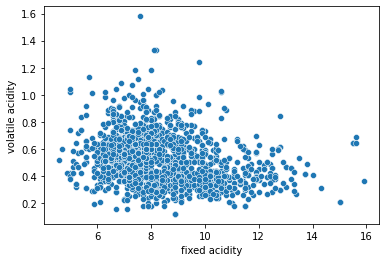

In [75]:
sns.scatterplot(x = 'fixed acidity',y = 'volatile acidity',data = df)

In [76]:
np.corrcoef(df['pH'],df['alcohol'])

array([[1.        , 0.20563251],
       [0.20563251, 1.        ]])

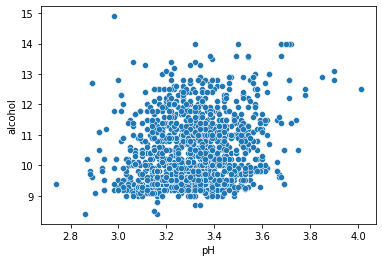

In [77]:
sns.scatterplot(x = 'pH',y = 'alcohol',data =df)

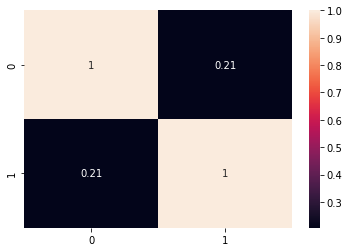

In [80]:
sns.heatmap( np.corrcoef(df['pH'],df['alcohol']),annot = True)

In [82]:
slope,intercept = np.polyfit(df['pH'],df['alcohol'],deg = 1)

In [83]:
slope

1.4193983794186822

In [84]:
intercept 

5.723194410330938

In [85]:
line = slope * df['pH'] + intercept

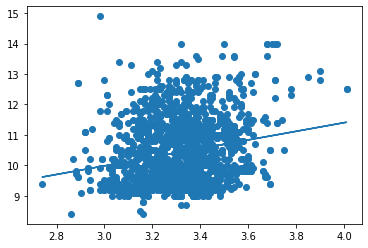

In [87]:
plt.plot(df['pH'],line)
plt.scatter(df['pH'],df['alcohol'])

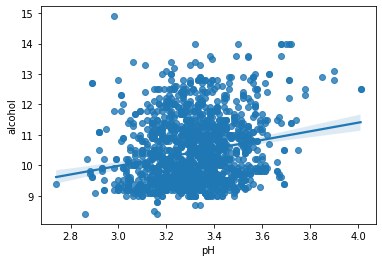

In [88]:
sns.regplot(x = df['pH'],y = df['alcohol'])

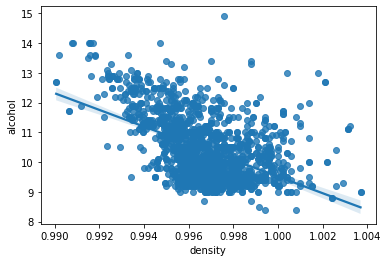

In [90]:
sns.regplot(x = df['density'],y = df['alcohol'])

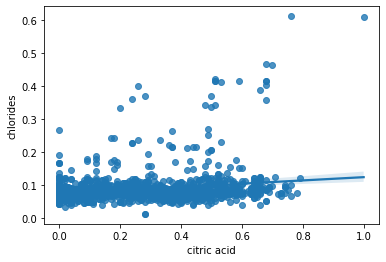

In [91]:
sns.regplot(x=df['citric acid'],y = df['chlorides'])

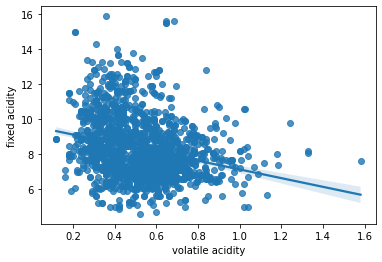

In [92]:
sns.regplot(x = df['volatile acidity'],y = df['fixed acidity'])

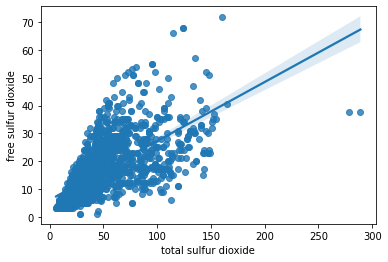

In [93]:
sns.regplot(x = df['total sulfur dioxide'],y = df['free sulfur dioxide'])

In [94]:
np.corrcoef(df['residual sugar'],df['alcohol'])

array([[1.        , 0.04207544],
       [0.04207544, 1.        ]])

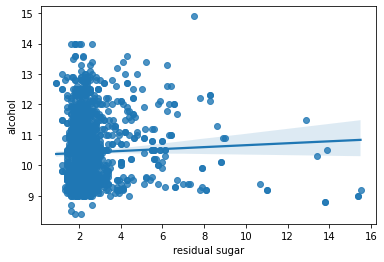

In [95]:
sns.regplot(x = 'residual sugar',y = 'alcohol',data =df)

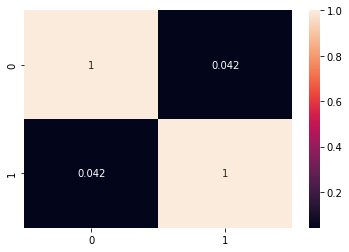

In [97]:
sns.heatmap(np.corrcoef(df['residual sugar'],df['alcohol']),annot = True)

In [98]:
# creating a function
def normal_dist(x,mu,sigma):
  prob_density=1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) )
  return prob_density

In [100]:
mean = df['alcohol'].mean()
mean

10.422983114446502

In [101]:
sd = df['alcohol'].std()
sd

1.0656675818473926

In [102]:
pdf = normal_dist(df['alcohol'],mean,sd)

In [105]:
pdf

0       0.236150
1       0.315557
2       0.315557
3       0.315557
4       0.236150
          ...   
1594    0.373383
1595    0.286975
1596    0.323315
1597    0.366253
1598    0.323315
Name: alcohol, Length: 1599, dtype: float64

Text(0, 0.5, 'Probability Density')

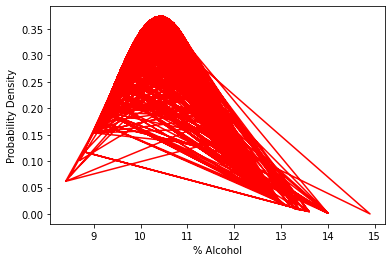

In [106]:
plt.plot(df['alcohol'],pdf,'r-')
plt.xlabel('% Alcohol')
plt.ylabel('Probability Density')

In [107]:
mn = df['pH'].mean()
mn

3.311113195747343

In [108]:
std = df['pH'].std()
std

0.15438646490354266

In [109]:
pdf1 = normal_dist(df['pH'],mn,std)

In [110]:
pdf1

0       1.127020
1       1.994449
2       2.446242
3       1.600530
4       1.127020
          ...   
1594    1.724114
1595    1.034622
1596    2.015047
1597    0.633435
1598    2.267806
Name: pH, Length: 1599, dtype: float64

Text(0, 0.5, 'Probability Distribution')

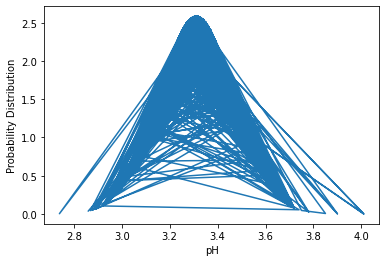

In [111]:
plt.plot(df['pH'],pdf1)
plt.xlabel('pH')
plt.ylabel('Probability Distribution')